## Sentiment Analysis 

In [36]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from textblob import TextBlob
from wordcloud import WordCloud, STOPWORDS
import emoji
from collections import Counter
import plotly.graph_objs as go
from plotly.offline import iplot
import os

#### Importing Data

In [2]:
df = pd.read_csv(r'UScomments.csv', error_bad_lines = False)
df

C:\Users\OMKAR\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  exec(code_obj, self.user_global_ns, self.user_ns)
b'Skipping line 41589: expected 4 fields, saw 11\nSkipping line 51628: expected 4 fields, saw 7\nSkipping line 114465: expected 4 fields, saw 5\n'
b'Skipping line 142496: expected 4 fields, saw 8\nSkipping line 189732: expected 4 fields, saw 6\nSkipping line 245218: expected 4 fields, saw 7\n'
b'Skipping line 388430: expected 4 fields, saw 5\n'
C:\Users\OMKAR\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (2,3) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,video_id,comment_text,likes,replies
0,XpVt6Z1Gjjo,Logan Paul it's yo big day ‼️‼️‼️,4,0
1,XpVt6Z1Gjjo,I've been following you from the start of your...,3,0
2,XpVt6Z1Gjjo,Say hi to Kong and maverick for me,3,0
3,XpVt6Z1Gjjo,MY FAN . attendance,3,0
4,XpVt6Z1Gjjo,trending 😉,3,0
...,...,...,...,...
691395,EoejGgUNmVU,Лучшая,1,0
691396,EoejGgUNmVU,qu'est ce que j'aimerais que tu viennes à Roan...,0,0
691397,EoejGgUNmVU,Ven a mexico! 😍 te amo LP,0,0
691398,EoejGgUNmVU,Islığı yeter...,0,0


In [6]:
df.head()

,video_id,comment_text,likes,replies
0,XpVt6Z1Gjjo,Logan Paul it's yo big day ‼️‼️‼️,4,0
1,XpVt6Z1Gjjo,I've been following you from the start of your...,3,0
2,XpVt6Z1Gjjo,Say hi to Kong and maverick for me,3,0
3,XpVt6Z1Gjjo,MY FAN . attendance,3,0
4,XpVt6Z1Gjjo,trending 😉,3,0


#### Checking for null values

In [8]:
df.isna().sum()

video_id         0
comment_text    25
likes            0
replies          0
dtype: int64

#### Dropping null values

In [9]:
df.dropna(inplace=True)

In [10]:
df.isna().sum()

video_id        0
comment_text    0
likes           0
replies         0
dtype: int64

## Sentiment Analysis using TextBlob

In [19]:
polarity=[]
for comment in df['comment_text']:
    try:
        polarity.append(TextBlob(comment).sentiment.polarity)
    except:
        polarity.append(0)


In [24]:
polarity[0:10]

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.8, -0.13571428571428573]

#### Applying the sentiment on each entry in the table

In [22]:
df['polarity']= polarity
df


,video_id,comment_text,likes,replies,polarity
0,XpVt6Z1Gjjo,Logan Paul it's yo big day ‼️‼️‼️,4,0,0.0
1,XpVt6Z1Gjjo,I've been following you from the start of your...,3,0,0.0
2,XpVt6Z1Gjjo,Say hi to Kong and maverick for me,3,0,0.0
3,XpVt6Z1Gjjo,MY FAN . attendance,3,0,0.0
4,XpVt6Z1Gjjo,trending 😉,3,0,0.0
...,...,...,...,...,...
691395,EoejGgUNmVU,Лучшая,1,0,0.0
691396,EoejGgUNmVU,qu'est ce que j'aimerais que tu viennes à Roan...,0,0,0.0
691397,EoejGgUNmVU,Ven a mexico! 😍 te amo LP,0,0,0.0
691398,EoejGgUNmVU,Islığı yeter...,0,0,0.0


#### Unique values 

In [23]:
print(df['polarity'].unique())

[ 0.          0.8        -0.13571429 ...  0.38350313 -0.03787879
 -0.1155303 ]


## Sentiment Analysis using wordcloud

#### Storing positive and negative comments


In [26]:
df_positive = df[df['polarity']==1]
df_positive

,video_id,comment_text,likes,replies,polarity
64,XpVt6Z1Gjjo,yu are the best,1,0,1.0
156,cLdxuaxaQwc,Power is the disease. Care is the cure. Keep...,0,0,1.0
227,WYYvHb03Eog,YAS Can't wait to get it! I just need to sell ...,0,0,1.0
307,sjlHnJvXdQs,This is priceless,0,0,1.0
319,sjlHnJvXdQs,Summed up perfectly,0,0,1.0
...,...,...,...,...,...
691373,EoejGgUNmVU,Perfect. Every version,0,0,1.0
691383,EoejGgUNmVU,Me encantaaaaa <3,0,0,1.0
691388,EoejGgUNmVU,Best song ever 🤘,0,0,1.0
691389,EoejGgUNmVU,excellent performance,0,0,1.0


In [27]:
df_negative = df[df['polarity']==-1]
df_negative

,video_id,comment_text,likes,replies,polarity
512,8wNr-NQImFg,BEN CARSON IS THE MAN!!!!! THEY HATE HIM CAUSE...,0,0,-1.0
562,8wNr-NQImFg,Well… The brain surgeon Ben Carson just proved...,0,0,-1.0
952,Ayb_2qbZHm4,WHY DID YOU MAKE FURRY FORCE?! SO NASTY!!!,0,0,-1.0
1371,vu_9muoxT50,WTF BRUH!!!!!!,0,0,-1.0
1391,vu_9muoxT50,cheeseus christ thats insane!!!,0,0,-1.0
...,...,...,...,...,...
690788,Hlt3rA-oDao,Like Kelly she evil,0,0,-1.0
690865,Ni5Uc-DdMqk,R U FUCKING KIDDING ME?!?!?!?!,11,1,-1.0
691073,4kmSATD25iY,This is horribly offensive please report,0,0,-1.0
691180,xlu6i6lT_vk,Sink holes looks terrifying sinkholes sink you...,0,0,-1.0


#### Joining all positive and negative comments

In [35]:
total_comments1 = ' '.join(df_positive['comment_text'])
total_comments1[0:100]

'yu are the best Power is the disease.\xa0 Care is the cure.\xa0 Keep caring for yourself and others as bes'

In [36]:
total_comments2 = ' '.join(df_negative['comment_text'])
total_comments2[0:100]

"BEN CARSON IS THE MAN!!!!! THEY HATE HIM CAUSE HE EXPOSED HITLARY'S RITUAL ABUSE ON CHILDREN!!!!!!! "

#### Removing all Stopwords

In [37]:
wordcloud_p=WordCloud(stopwords=set(STOPWORDS)).generate(total_comments1)
wordcloud_p

In [38]:
wordcloud_n=WordCloud(stopwords=set(STOPWORDS)).generate(total_comments2)
wordcloud_n

#### Visualization

(-0.5, 399.5, 199.5, -0.5)

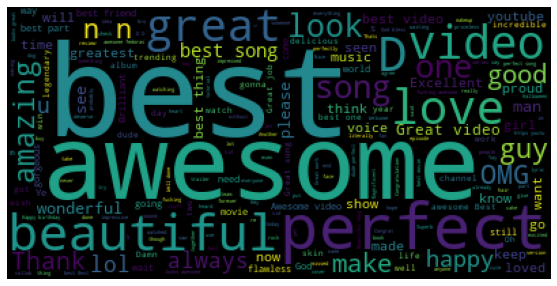

In [39]:
plt.figure(figsize=(15,5))
plt.imshow(wordcloud_p)
plt.axis('off')

(-0.5, 399.5, 199.5, -0.5)

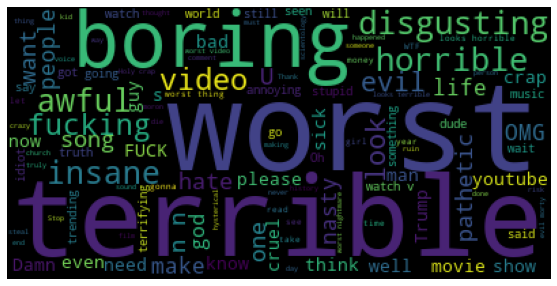

In [40]:
plt.figure(figsize=(15,5))
plt.imshow(wordcloud_n)
plt.axis('off')

## Emoji Analysis

#### Extracting emojis from comments

In [26]:
emoji_list = []
for comment in df['comment_text'].dropna():
    for char in comment:
        if char in emoji.distinct_emoji_list(char):
            emoji_list.append(char)

In [24]:
print(emoji_list[0:10])

['‼', '‼', '‼', '😉', '😭', '👍', '🏻', '❤', '😍', '💋']


In [25]:
len(emoji_list)

65954

#### Computing frquencies of each emoji in list

In [30]:
emojis = [Counter(emoji_list).most_common(10)[i][0] for i in range(10)]
emojis

['😂', '😍', '❤', '🔥', '😭', '👏', '😘', '👍', '💖', '💕']

In [32]:
freqs = [Counter(emoji_list).most_common(10)[i][1] for i in range(10)]
freqs

[36987, 33453, 31119, 8694, 8398, 5719, 5545, 5476, 5359, 5147]

#### Visualization

In [35]:
trace=go.Bar(x=emojis,y=freqs)
iplot([trace])

## Collect Entire Data from Youtube

In [37]:
path = r'additional_data'

In [38]:
files = os.listdir(path)
files

['CAvideos.csv',
 'CA_category_id.json',
 'DEvideos.csv',
 'DE_category_id.json',
 'FRvideos.csv',
 'FR_category_id.json',
 'GBvideos.csv',
 'GB_category_id.json',
 'INvideos.csv',
 'IN_category_id.json',
 'JPvideos.csv',
 'JP_category_id.json',
 'KRvideos.csv',
 'KR_category_id.json',
 'MXvideos.csv',
 'MX_category_id.json',
 'RUvideos.csv',
 'RU_category_id.json',
 'USvideos.csv',
 'US_category_id.json']

#### Selecting only CSV files

In [39]:
files_csv=[files[i] for i in range(0,len(files),2)]
files_csv

['CAvideos.csv',
 'DEvideos.csv',
 'FRvideos.csv',
 'GBvideos.csv',
 'INvideos.csv',
 'JPvideos.csv',
 'KRvideos.csv',
 'MXvideos.csv',
 'RUvideos.csv',
 'USvideos.csv']

In [42]:
full_df=pd.DataFrame()

for file in files_csv:
    current_df=pd.read_csv(path+'/'+file,encoding='iso-8859-1',error_bad_lines=False)
    current_df['country']=file.split('.')[0][0:2]
    full_df=pd.concat([full_df,current_df])

C:\Users\OMKAR\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: FutureWarning:

The error_bad_lines argument has been deprecated and will be removed in a future version.





In [41]:
full_df.head(4)

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,country
0,n1WpP7iowLc,17.14.11,Eminem - Walk On Water (Audio) ft. BeyoncÃ©,EminemVEVO,10,2017-11-10T17:00:03.000Z,"Eminem|""Walk""|""On""|""Water""|""Aftermath/Shady/In...",17158579,787425,43420,125882,https://i.ytimg.com/vi/n1WpP7iowLc/default.jpg,False,False,False,Eminem's new track Walk on Water ft. BeyoncÃ© ...,CA
1,0dBIkQ4Mz1M,17.14.11,PLUSH - Bad Unboxing Fan Mail,iDubbbzTV,23,2017-11-13T17:00:00.000Z,"plush|""bad unboxing""|""unboxing""|""fan mail""|""id...",1014651,127794,1688,13030,https://i.ytimg.com/vi/0dBIkQ4Mz1M/default.jpg,False,False,False,STill got a lot of packages. Probably will las...,CA
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146035,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO â¶ \n\nSUBSCRIBE âº ...,CA
3,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095828,132239,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...,CA


## Most liked Category

#### Storing category_id and category_name

In [43]:
full_df['category_id'].unique()

array([10, 23, 24, 25, 22, 26,  1, 28, 20, 17, 29, 15, 19,  2, 27, 43, 30,
       44], dtype=int64)

In [45]:
cat = pd.read_csv(r'category_file.csv')
cat

,category_id,category_columns
0,1,Film & Animation
1,2,Autos & Vehicles
2,10,Music
3,15,Pets & Animals
4,17,Sports
5,18,Short Movies
6,19,Travel & Events
7,20,Gaming
8,21,Videoblogging
9,22,People & Blogs


In [48]:
dct = cat.to_dict()
dct

{'category_id': {0: 1,
  1: 2,
  2: 10,
  3: 15,
  4: 17,
  5: 18,
  6: 19,
  7: 20,
  8: 21,
  9: 22,
  10: 23,
  11: 24,
  12: 25,
  13: 26,
  14: 27,
  15: 28,
  16: 29,
  17: 30,
  18: 31,
  19: 32,
  20: 33,
  21: 34,
  22: 35,
  23: 36,
  24: 37,
  25: 38,
  26: 39,
  27: 40,
  28: 41,
  29: 42,
  30: 43,
  31: 44},
 'category_columns': {0: ' Film & Animation',
  1: ' Autos & Vehicles',
  2: ' Music',
  3: ' Pets & Animals',
  4: ' Sports',
  5: ' Short Movies',
  6: ' Travel & Events',
  7: ' Gaming',
  8: ' Videoblogging',
  9: ' People & Blogs',
  10: ' Comedy',
  11: ' Entertainment',
  12: ' News & Politics',
  13: ' Howto & Style',
  14: ' Education',
  15: ' Science & Technology',
  16: ' Nonprofits & Activism',
  17: ' Movies',
  18: ' Anime/Animation',
  19: ' Action/Adventure',
  20: ' Classics',
  21: ' Comedy',
  22: ' Documentary',
  23: ' Drama',
  24: ' Family',
  25: ' Foreign',
  26: ' Horror',
  27: ' Sci-Fi/Fantasy',
  28: ' Thriller',
  29: ' Shorts',
  30: ' 

In [51]:
dct["category_columns"]

{0: ' Film & Animation',
 1: ' Autos & Vehicles',
 2: ' Music',
 3: ' Pets & Animals',
 4: ' Sports',
 5: ' Short Movies',
 6: ' Travel & Events',
 7: ' Gaming',
 8: ' Videoblogging',
 9: ' People & Blogs',
 10: ' Comedy',
 11: ' Entertainment',
 12: ' News & Politics',
 13: ' Howto & Style',
 14: ' Education',
 15: ' Science & Technology',
 16: ' Nonprofits & Activism',
 17: ' Movies',
 18: ' Anime/Animation',
 19: ' Action/Adventure',
 20: ' Classics',
 21: ' Comedy',
 22: ' Documentary',
 23: ' Drama',
 24: ' Family',
 25: ' Foreign',
 26: ' Horror',
 27: ' Sci-Fi/Fantasy',
 28: ' Thriller',
 29: ' Shorts',
 30: ' Shows',
 31: ' Trailers            '}

In [52]:
full_df['category_name']=full_df['category_id'].map(dct['category_columns'])

In [53]:
full_df.head(3)

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,country,category_name
0,n1WpP7iowLc,17.14.11,Eminem - Walk On Water (Audio) ft. BeyoncÃ©,EminemVEVO,10,2017-11-10T17:00:03.000Z,"Eminem|""Walk""|""On""|""Water""|""Aftermath/Shady/In...",17158579,787425,43420,125882,https://i.ytimg.com/vi/n1WpP7iowLc/default.jpg,False,False,False,Eminem's new track Walk on Water ft. BeyoncÃ© ...,CA,Comedy
1,0dBIkQ4Mz1M,17.14.11,PLUSH - Bad Unboxing Fan Mail,iDubbbzTV,23,2017-11-13T17:00:00.000Z,"plush|""bad unboxing""|""unboxing""|""fan mail""|""id...",1014651,127794,1688,13030,https://i.ytimg.com/vi/0dBIkQ4Mz1M/default.jpg,False,False,False,STill got a lot of packages. Probably will las...,CA,Drama
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146035,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO â¶ \n\nSUBSCRIBE âº ...,CA,Drama


#### Visualization

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 [Text(0, 0, ' Comedy'),
  Text(1, 0, ' Drama'),
  Text(2, 0, ' Family'),
  Text(3, 0, ' Foreign'),
  Text(4, 0, ' Documentary'),
  Text(5, 0, ' Horror'),
  Text(6, 0, ' Autos & Vehicles'),
  Text(7, 0, ' Thriller'),
  Text(8, 0, ' Classics'),
  Text(9, 0, ' Movies'),
  Text(10, 0, ' Shorts'),
  Text(11, 0, ' Science & Technology'),
  Text(12, 0, ' Action/Adventure'),
  Text(13, 0, ' Music'),
  Text(14, 0, ' Sci-Fi/Fantasy'),
  Text(15, 0, ' Shows')])

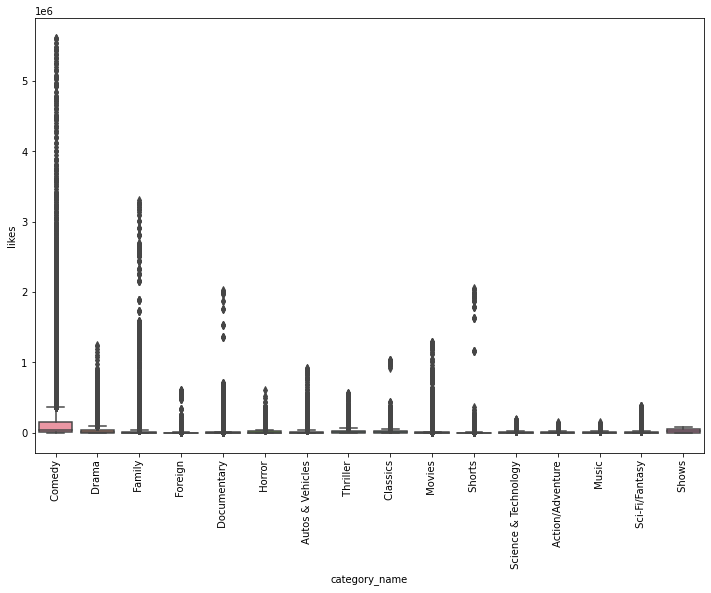

In [55]:
plt.figure(figsize = (12,8))
sns.boxplot(x = 'category_name',y = 'likes',data = full_df)
plt.xticks(rotation = 'vertical')